## Exercise 1 : The Breast Cancer Dataset

<img src="https://www.narayanahealth.org/blog/wp-content/uploads/2019/10/shutterstock_1504376909.jpg" alt=" " width="300"/>

This exercise is based on the project template presented in Lecture 6 of the Master's degree course in Data Science and was created in collaboration with **"The Breast Cancer Dataset"**. By using this template, a methodical approach to machine learning in the context of data analysis for breast cancer is ensured. This exercise highlights the need to provide precise information for each stage listed in the project template by using the Breast Cancer dataset. The thorough description of every step guarantees that the exercise achieves its goals by offering the required solutions and insights needed within the dataset's context. With a specific focus on breast cancer data in this case, the structured method ensures a comprehensive grasp of the machine learning process and its application to real-world settings.

Breast cancer is the most common cancer among women worldwide, with the highest incidence rates found in Western and Northern Europe, North America, and Australia/New Zealand. The disease starts when abnormalities in the normal process of cell growth occur, which result in the unchecked creation of new cells and the inability of injured cells to go through the prescribed death process. As a result, an uncontrolled growth may lead to the formation of a cancerous or malignant tumor. specific the available data, our research attempts aim to utilize this information to determine the most accurate status of a specific tumor: malignant or benign.By exploring each aspect of the information, we want to improve the diagnostic precision that is essential for successful medicinal therapies and add useful information to the larger picture of breast cancer.


Let's start by importing specific libraries that has to be imported. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer     # the dataset of the breast cancer 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split   
import seaborn as sns
from pandas.plotting import scatter_matrix


### The Dataset

In [2]:
breast_cancer = load_breast_cancer()
print('The dataset of "The Breast Cancer" looks like :')
print(breast_cancer)

The dataset of "The Breast Cancer" looks like :
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1

Now, the data will be loaded to a data frame. 

In [3]:
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As depicted in the displayed information, there are 30 columns that convey the dimensional aspects of the cancer dataset. The inclusion of the "class" column completes the dataset, presenting a binary distinction. The "class" column specifically comprises two values: '1' designating **benign** and '0' indicating **malignant**.

In [4]:
# adding the 'target' column to the data frame 
df_breast_cancer['class'] = breast_cancer.target
df_breast_cancer.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


### The dimensions of the dataset

In [5]:
print('The dimensions of the dataset are :')
df_breast_cancer.shape

The dimensions of the dataset are :


(569, 31)

The numbers presented above inform us that the dataset consists of 569 rows and 31 columns. This implies that we have data from 569 distinct individuals. Among these, there are 30 dimensions representing various features, and one column serves as an indicator of the target groups, categorizing them as either "benign" or "malignant".

### A peek at the dataset

Let's see what type are the values of every column.

In [6]:
print('Some information about the "Breast Cancer Dataset" : ')
df_breast_cancer.dtypes

Some information about the "Breast Cancer Dataset" : 


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [7]:
print('Checking for missing values (how many missing values there are in each column)')
df_breast_cancer.isnull().sum()

Checking for missing values (how many missing values there are in each column)


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

Luckily we don't have any missing value.

In order to show the entire dataframe, we're going to examine a sample of data from the initial and final rows. This provides an overview of the dataset's structure, revealing details about its features from beginning to end.

In [8]:
df_breast_cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df_breast_cancer.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


###  Statistical summary of all attributes

With the command below we will have a dataframe which will show us statistical information of each attribute:
- Count: how many values the attribute has
- Mean: the mean of all values of the attribute
- Standard Deviation: the amount of variation values have. Low 
 means values are closer to the mean
- Minimum value
- 25th Percentile: the value under which 25% of the instances can be found
- 50th Percentile: the value under which 50% of the instances can be found (also called the median, is the value that splits the distribution in half)
- 75th Percentile: the value under which 75% of the instances can be found
- Maximum value

In [10]:
df_breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


###  The class distribution (number of instances per class)

In [11]:
df_breast_cancer.groupby('class').size()

class
0    212
1    357
dtype: int64

As previously explained and as is clear from the data above, there are 357 cases classified as **benign** and 212 cases classified as **malignant**. Let's display it in a plotted histogram as well.

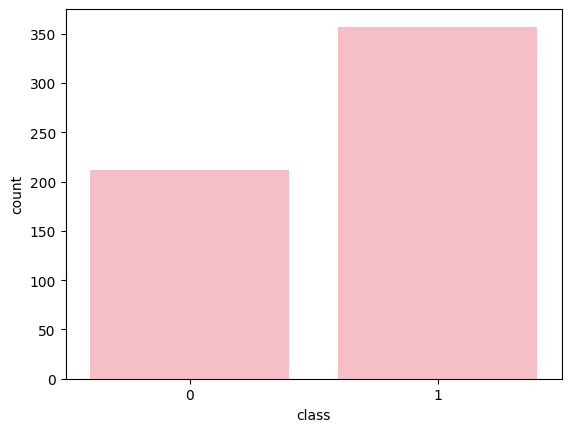

In [12]:
sns.countplot(data=df_breast_cancer, x='class', color='lightpink')
plt.show()

Skewness

A statistical metric known as skewness is used to characterize the asymmetry or lack of symmetry in a data distribution. The distribution's left and right sides are mirror reflections of one another, and its skewness is 0 in a perfectly symmetrical distribution. On the other hand, a skewed distribution suggests that the distribution's tails are not balanced. 

The skewness value can provide insights into the shape of the distribution:

- If skewness is zero, the data is perfectly symmetrical.
- If skewness is positive, the distribution has a tail on the right side (right-skewed or positively skewed).
- If skewness is negative, the distribution has a tail on the left side (left-skewed or negatively skewed).

In [13]:
df_breast_cancer.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

It is observed that The most of the values above are positive. This means that on the graphs the distribution will be on the left side and the tail on the right side and the graphs presented below clearly demonstrate this tendency.

###  Univariate plots for each attribute


Histogram Plots with distribution

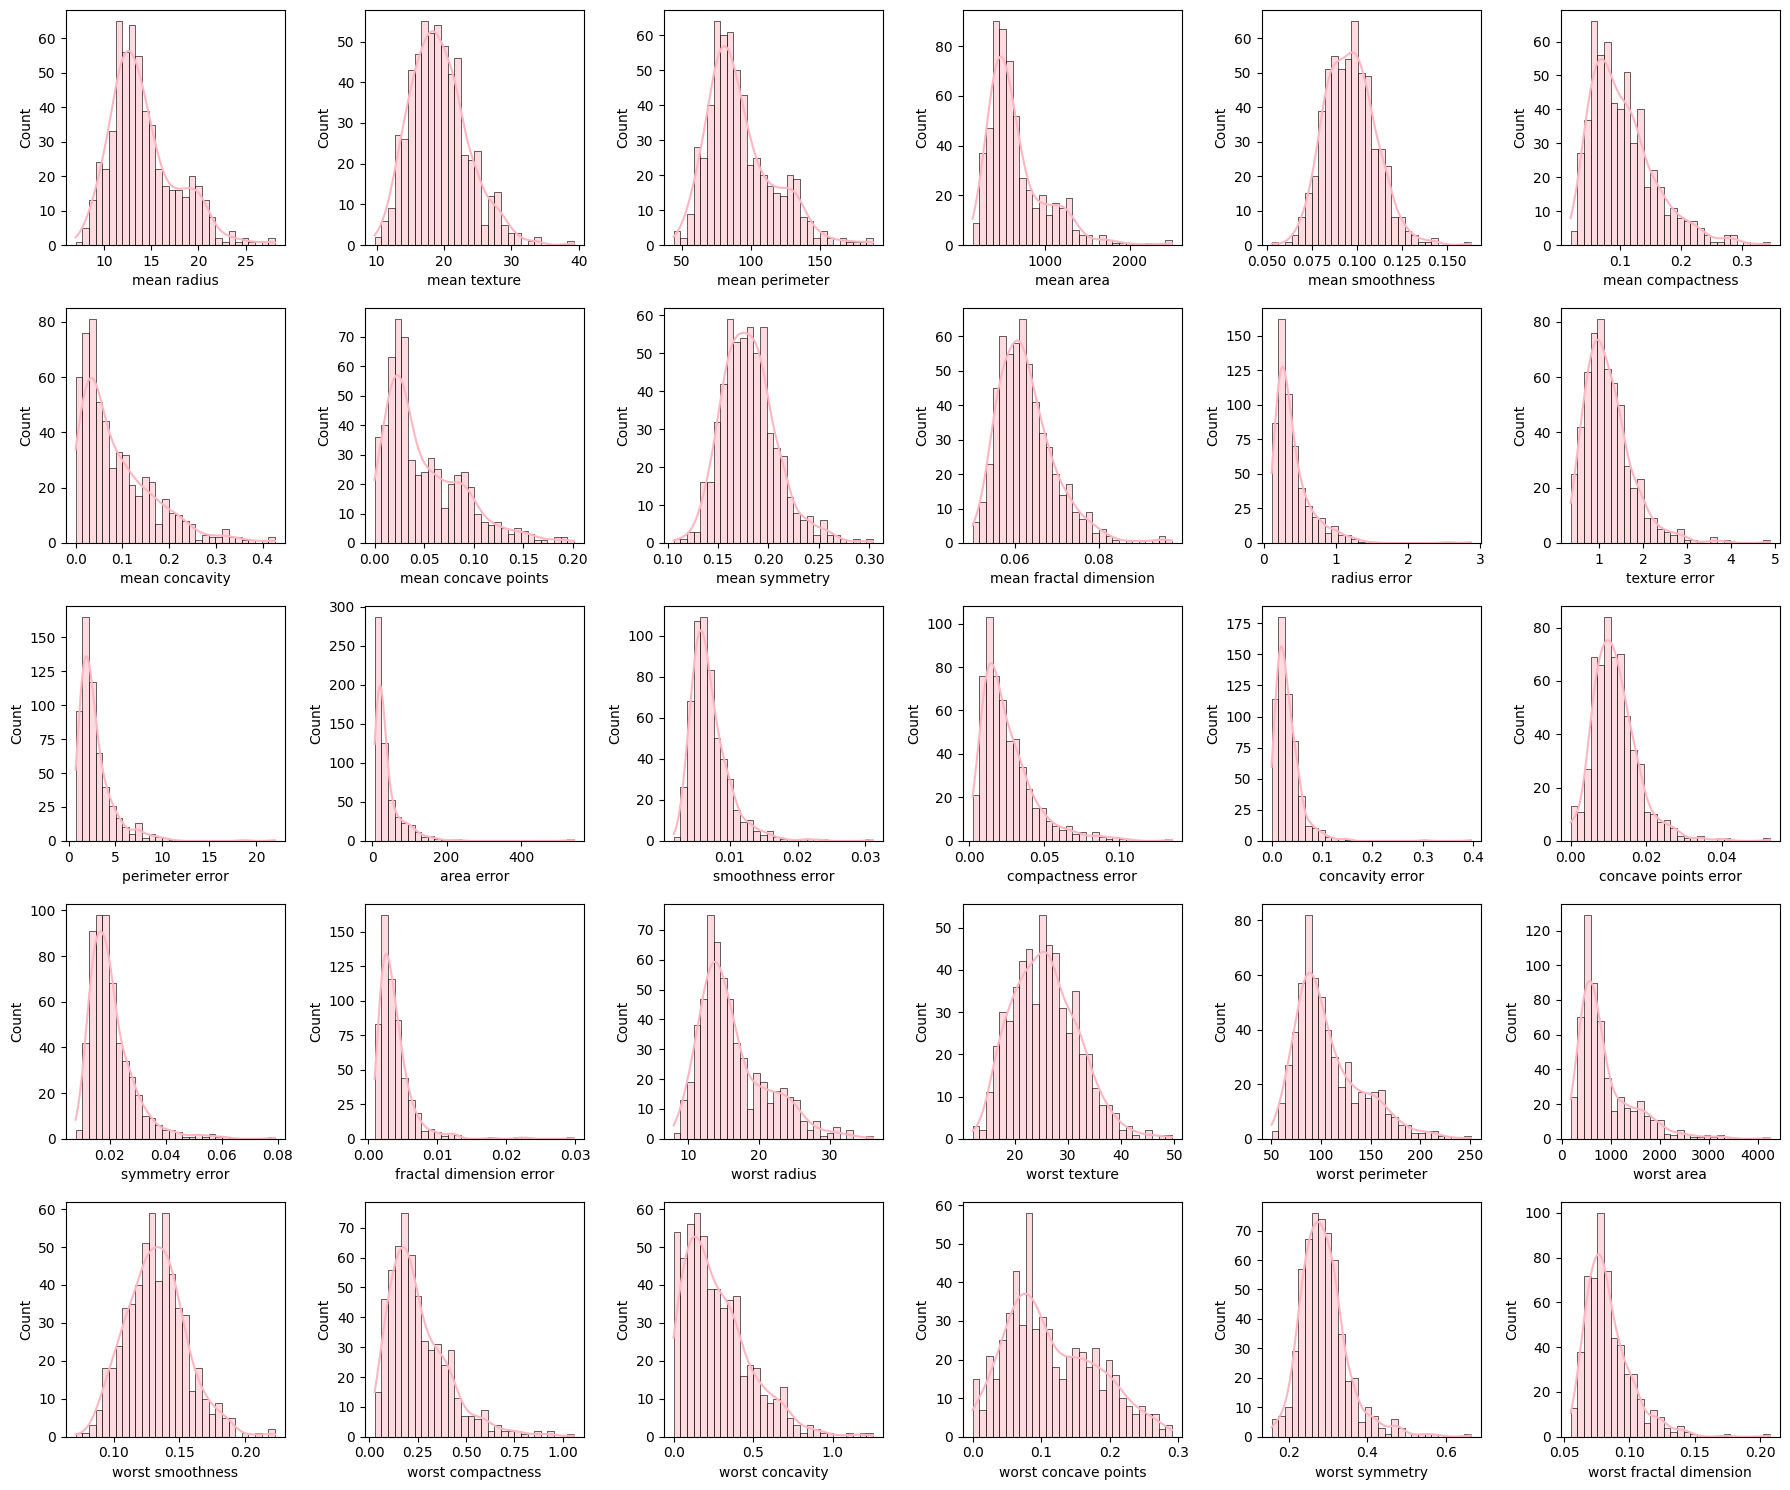

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18, 15))
axes = axes.flatten()
for i, x in enumerate(df_breast_cancer.columns[:-1]):  # in that way we exclude the last column which is the diagnoses 
    sns.histplot(df_breast_cancer[x], kde=True, color='lightpink', bins=30, ax=axes[i])
    axes[i].set_xlabel(x)
plt.tight_layout()

Histogram Plots

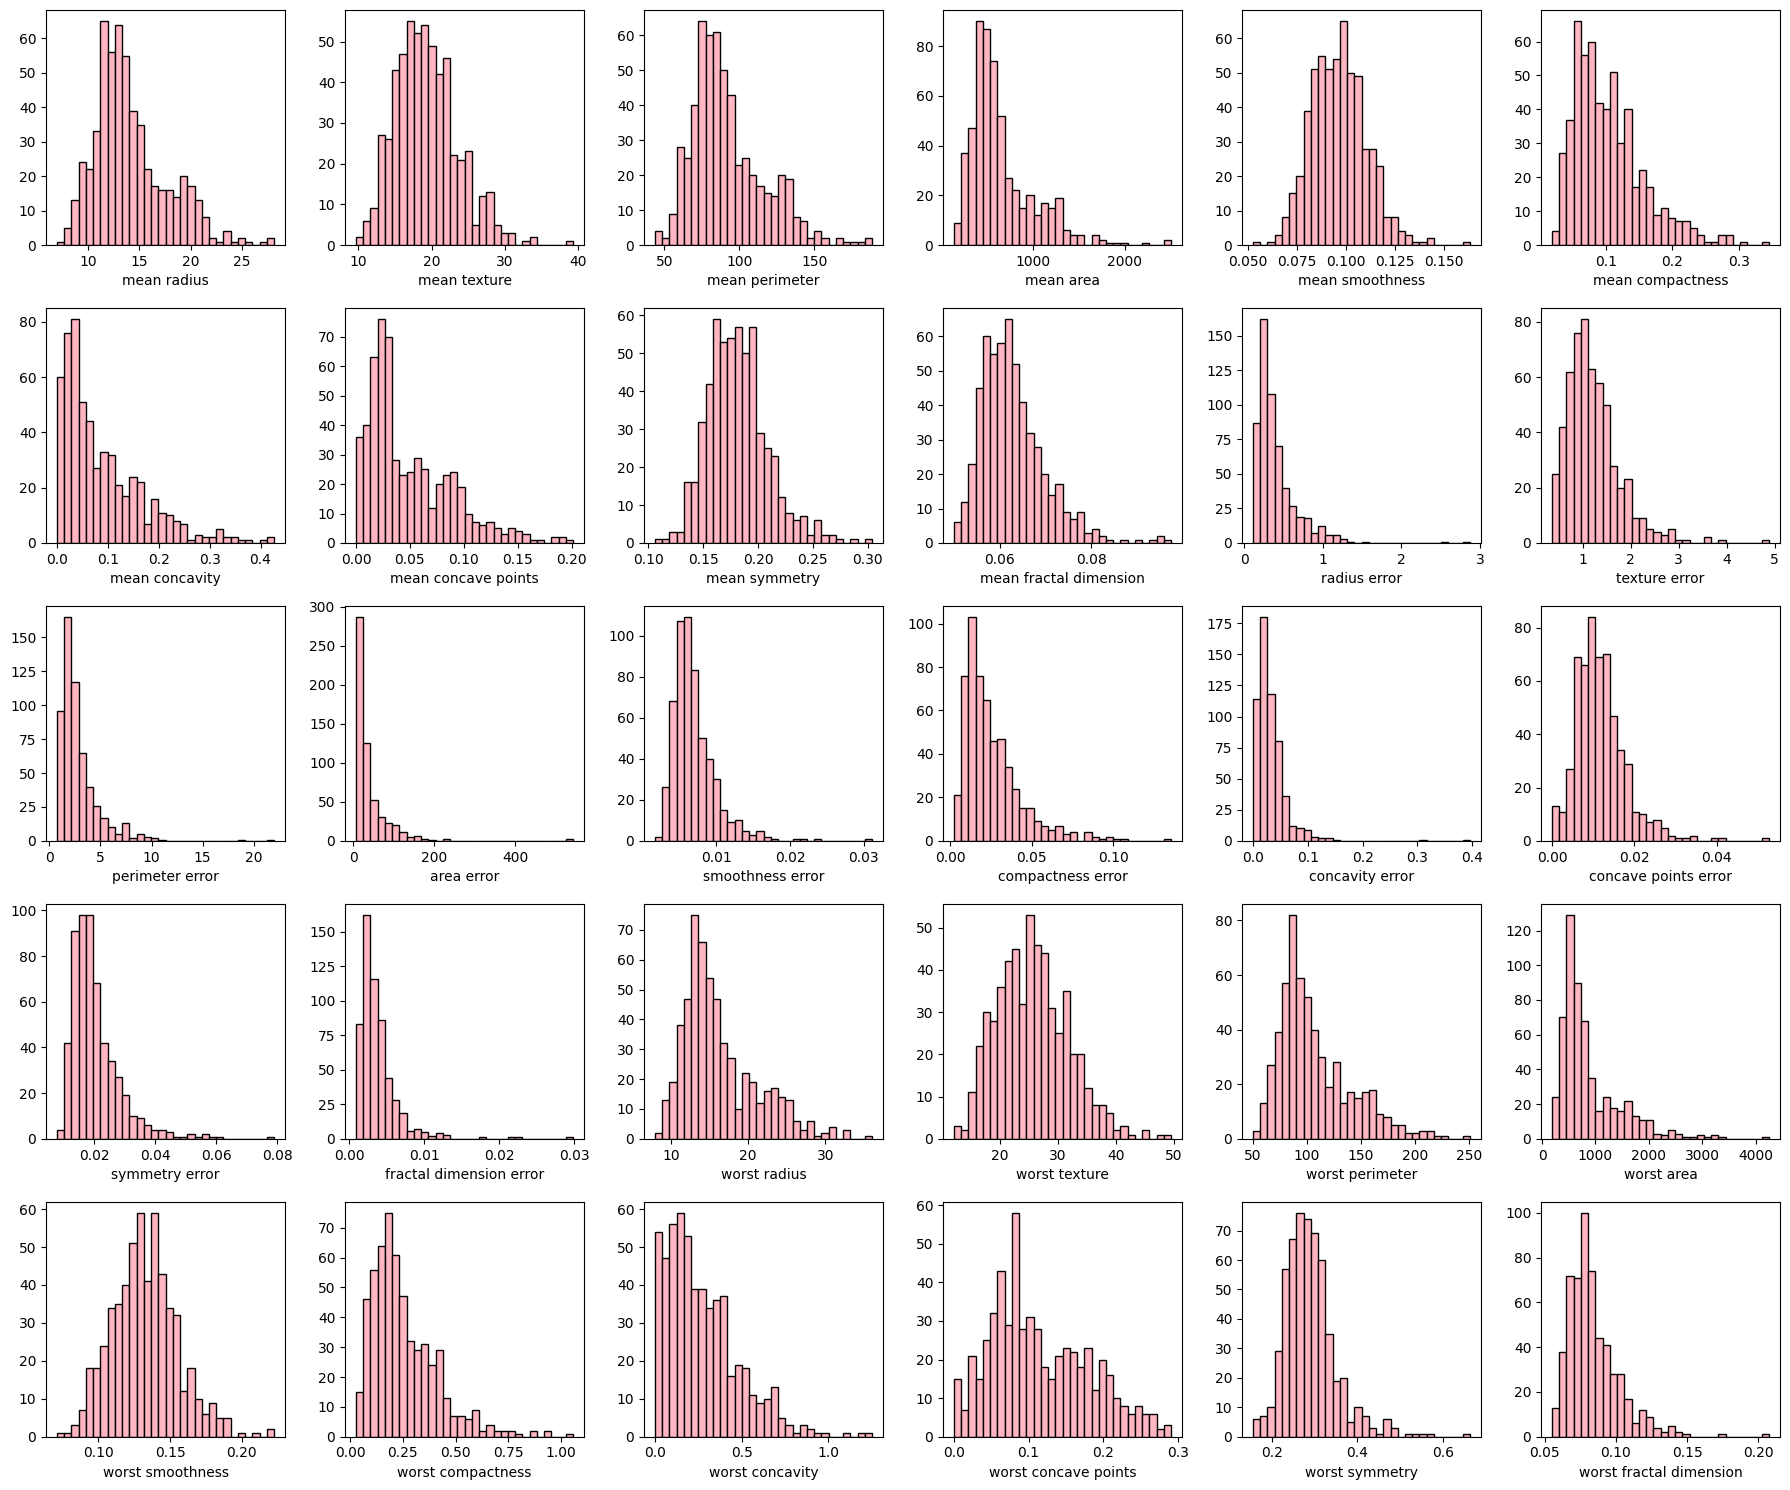

In [15]:
attributes = df_breast_cancer.columns
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18, 15))
axes = axes.flatten()

for i, attribute in enumerate(attributes[:-1]):
    axes[i].hist(df_breast_cancer[attribute], bins=30, color='lightpink', edgecolor='black')
    axes[i].set_xlabel(f'{attribute}')

plt.tight_layout()
plt.show()

Density Plots

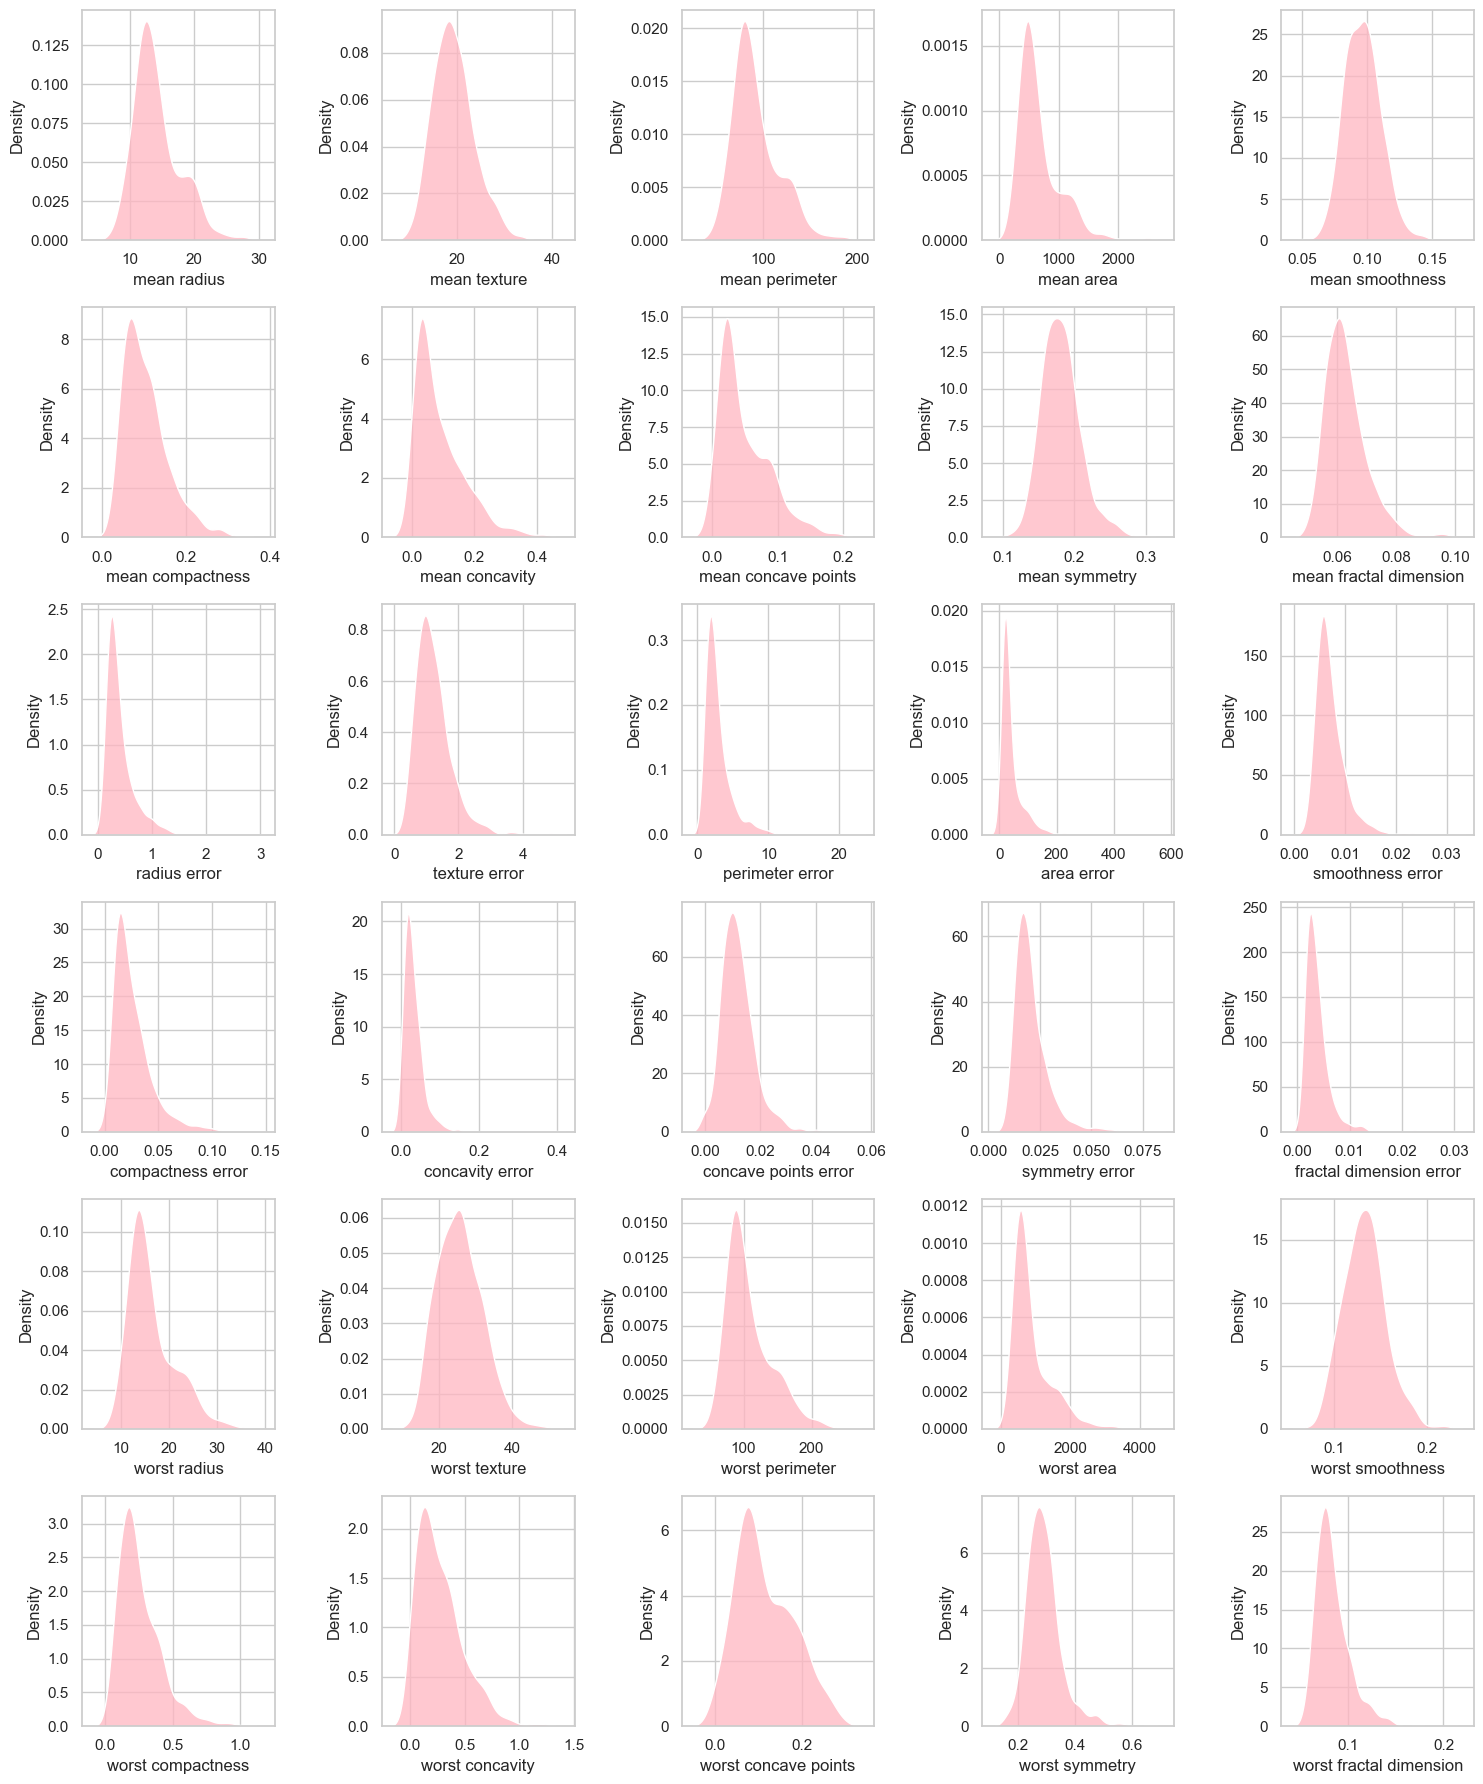

In [16]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 18))
axes = axes.flatten()

for i, attribute in enumerate(attributes[:-1]):
    sns.kdeplot(data=df_breast_cancer, x=attribute, fill=True, color='lightpink', ax=axes[i], multiple='stack')
    axes[i].set_xlabel(f'{attribute}')

plt.tight_layout()
plt.show()

Box Plots

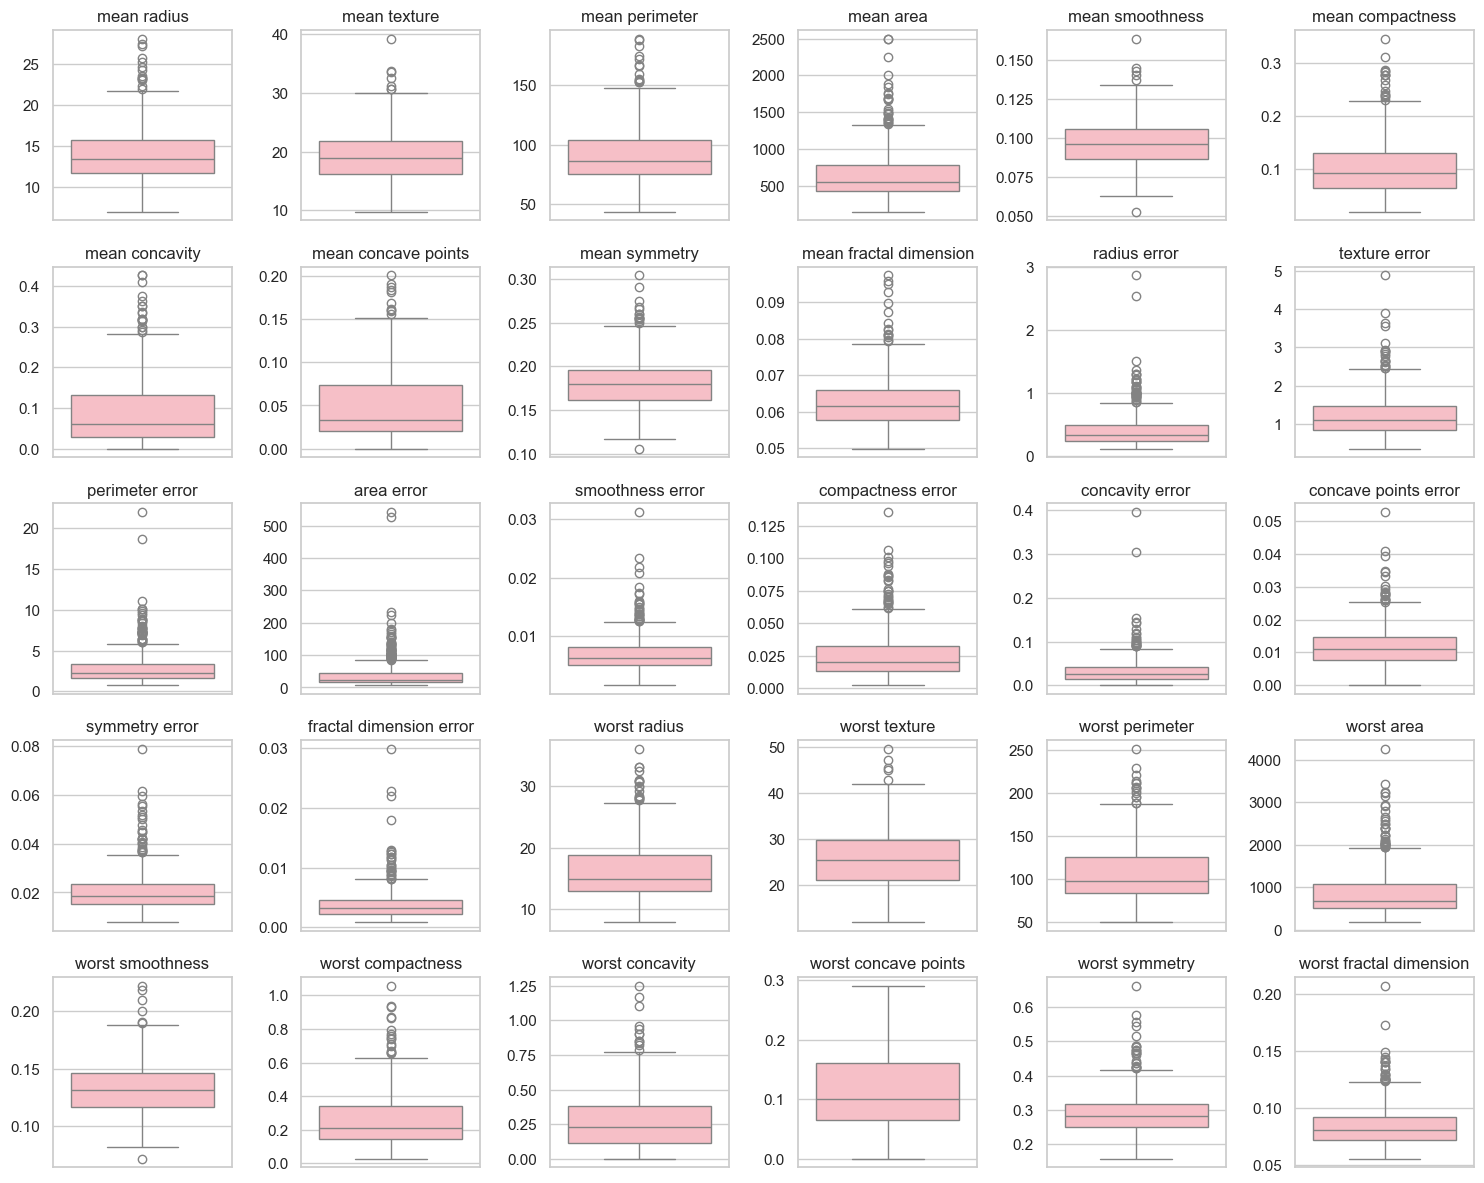

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(15, 12))
axes = axes.flatten()

for i, attribute in enumerate(attributes[:-1]):
    sns.boxplot(y=df_breast_cancer[attribute], ax=axes[i], color='lightpink')
    axes[i].set_title(f'{attribute}')
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('')  

plt.tight_layout()
plt.show()

#### Multivariate plots between attributes 

Histogram Plots of every attribute based on the class variable

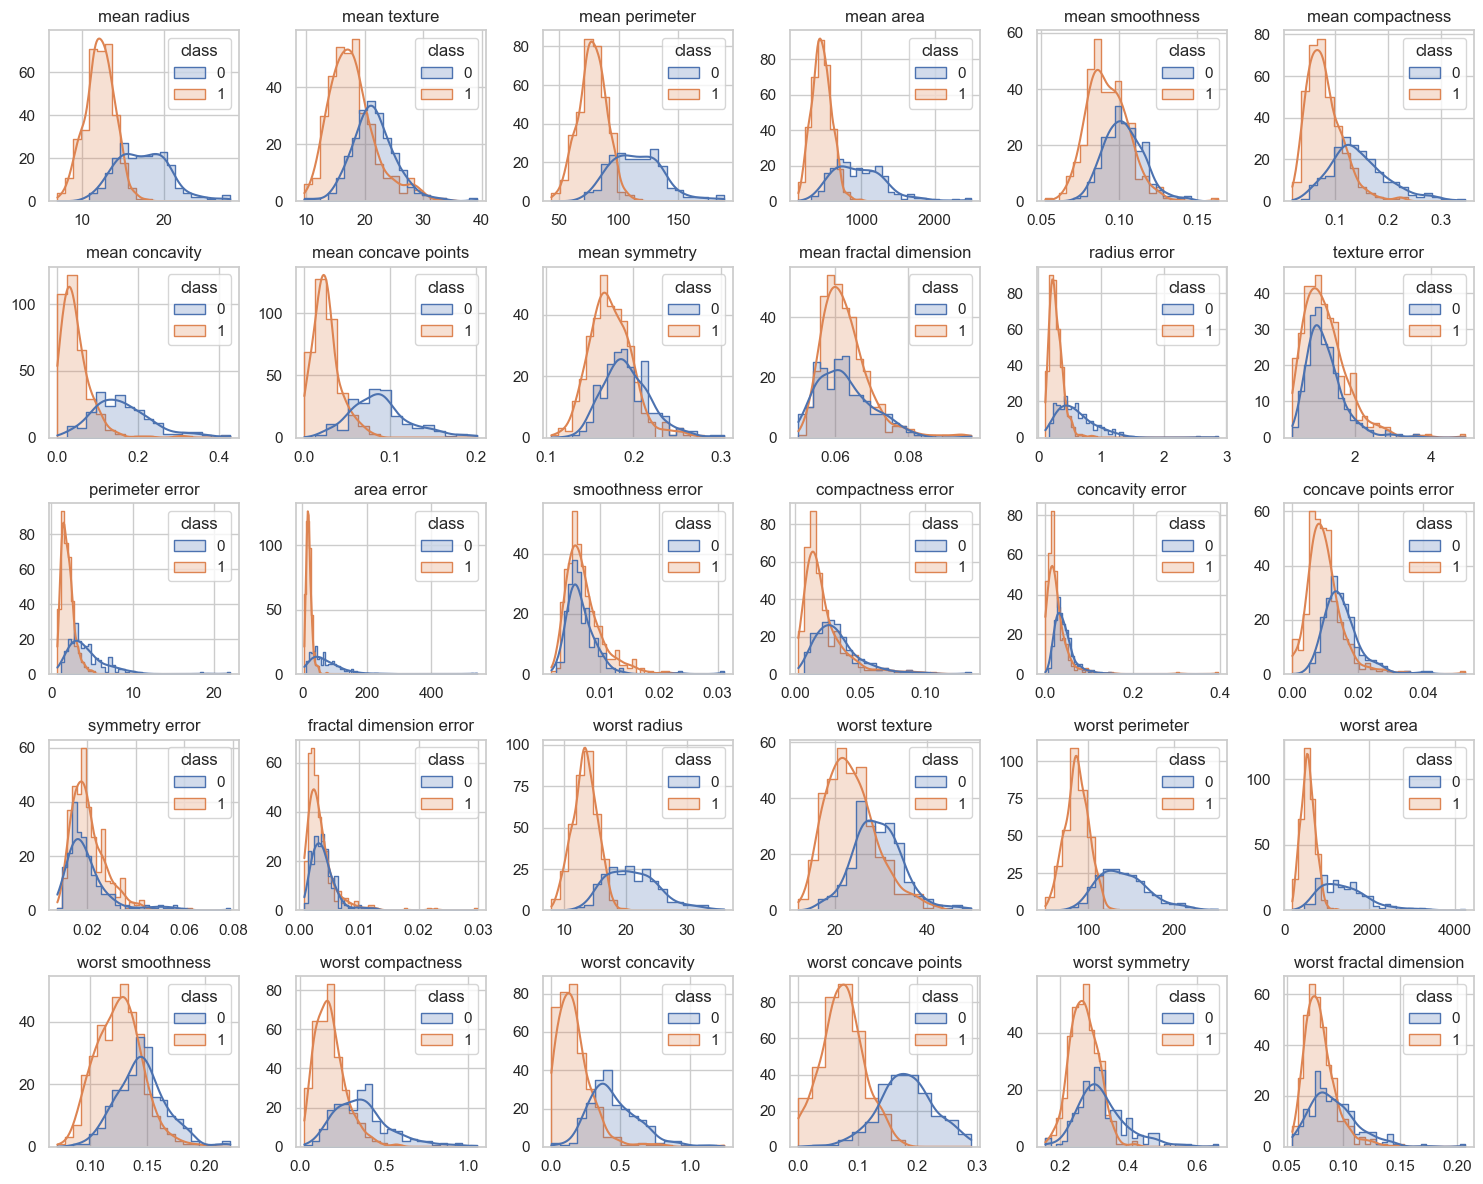

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(15, 12))


axes = axes.flatten()
target_colors = {'0': 'lightpink', '1': 'skyblue'}

for i, column in enumerate(attributes[:-1]):
    sns.histplot(data=df_breast_cancer, x=column, hue='class', element="step", common_norm=False, ax=axes[i], kde=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('')  

plt.tight_layout()
plt.show()

Box Plot of all attributes

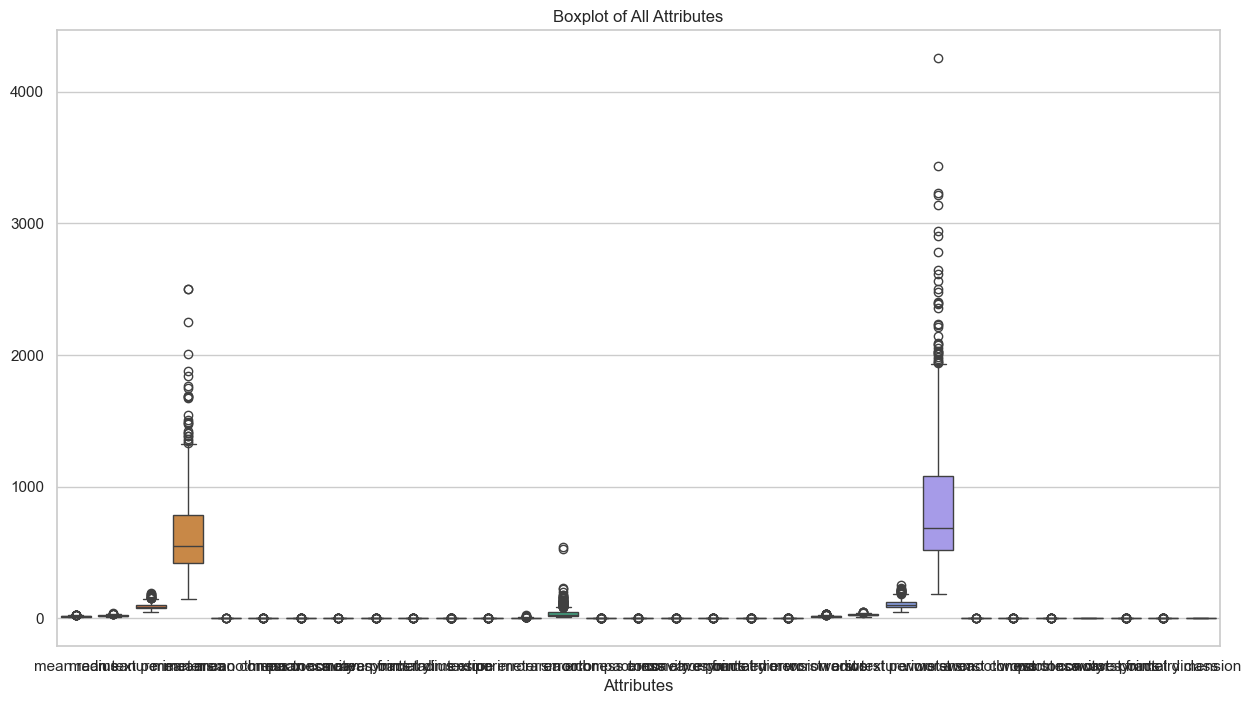

In [19]:
plt.figure(figsize=(15, 8))  # Adjust the figure size if needed
sns.boxplot(data=df_breast_cancer, orient='v')  # 'orient' specifies horizontal boxplots

# Set plot labels and title
plt.xlabel('Attributes')
plt.title('Boxplot of All Attributes')

# Show the plot
plt.show()

This boxplot it is hard to read it and understand it because the data aren't scaled. For this reason, the dataset is standardized in order to compare me easily than the one before. 

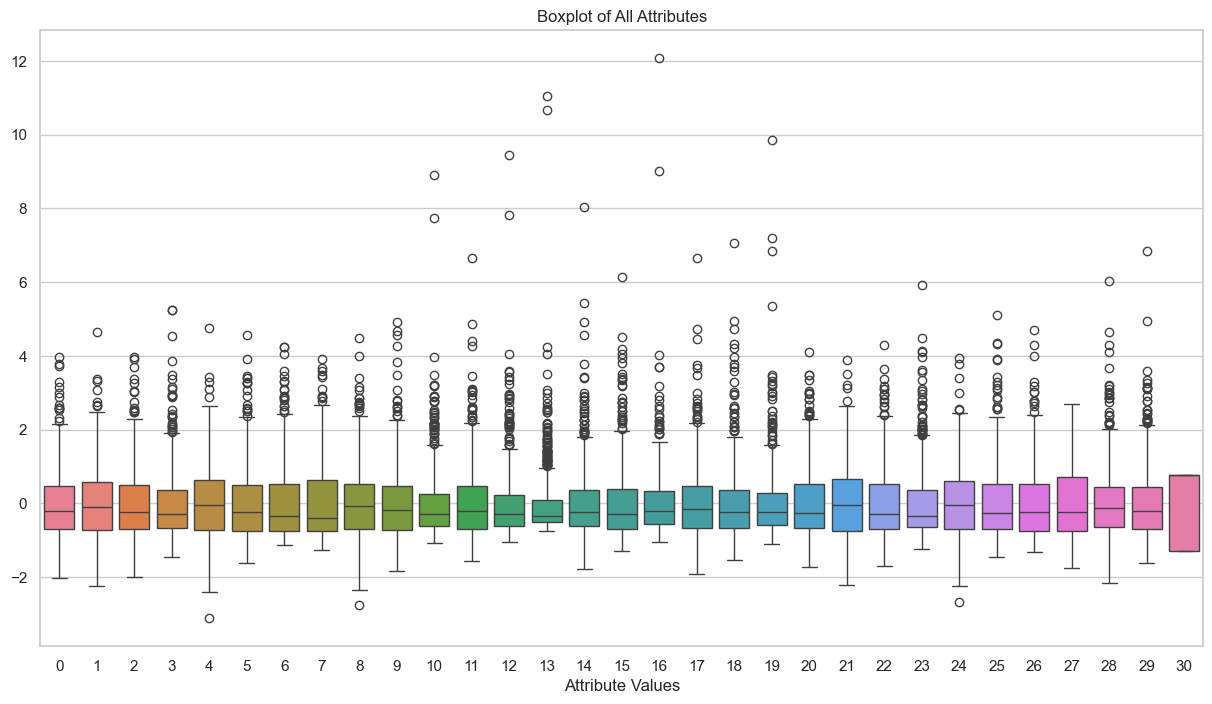

In [20]:
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_breast_cancer)
rescaledX = scaler.transform(df_breast_cancer)
# summarise transformed data
set_printoptions(precision=3)
#print(rescaledX[0:5,:])

plt.figure(figsize=(15, 8))  # Adjust the figure size if needed
sns.boxplot(rescaledX, orient='v')  # 'orient' specifies horizontal boxplots

# Set plot labels and title
plt.xlabel('Attribute Values')
plt.title('Boxplot of All Attributes')

# Show the plot
plt.show()

Correlation between attributes

The correlation is a value that indicates the strength of the relationship between variables. The coefficient can take any values from -1 to 1. The interpretations of the values are:

- -1     : Perfect negative correlation. The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
- (-1,0) : The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
- 0      :     No correlation. The variables do not have a relationship with each other.
- (0,1)  :  The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).
- 1      :      Perfect positive correlation. The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).

In [21]:
df_breast_cancer.corr(method='pearson')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838



In the given array, it's noticeable that the diagonal entries have a value of 1. This aligns with our expectations, as these diagonal elements represent the correlation of each specific attribute with itself. Consequently, perfect correlation is anticipated in these cases. In contrast, the off-diagonal elements encompass a range of values between -1 and 1. The key insight lies in the fact that values close to 0 indicate a lack of correlation, implying that these attributes don't provide significant information about each other.

For instance, when examining the "class" column and its correlation with other attributes, we observe that the "texture error" attribute (-0.083195) is not correlated with the class. Therefore, in the pursuit of an accurate prediction for test data, it would be prudent to downplay the significance of "texture error" for effective classification.

On the other hand the most positevely or negatively correlated attributes with the class are "worst concave points", "worst perimeter", "worst radious", "mean concave points", "mean area", "mean radious", "mean perimeter", and "mean concave points"

A visualization of the above correlation with the heatmap

<Axes: >

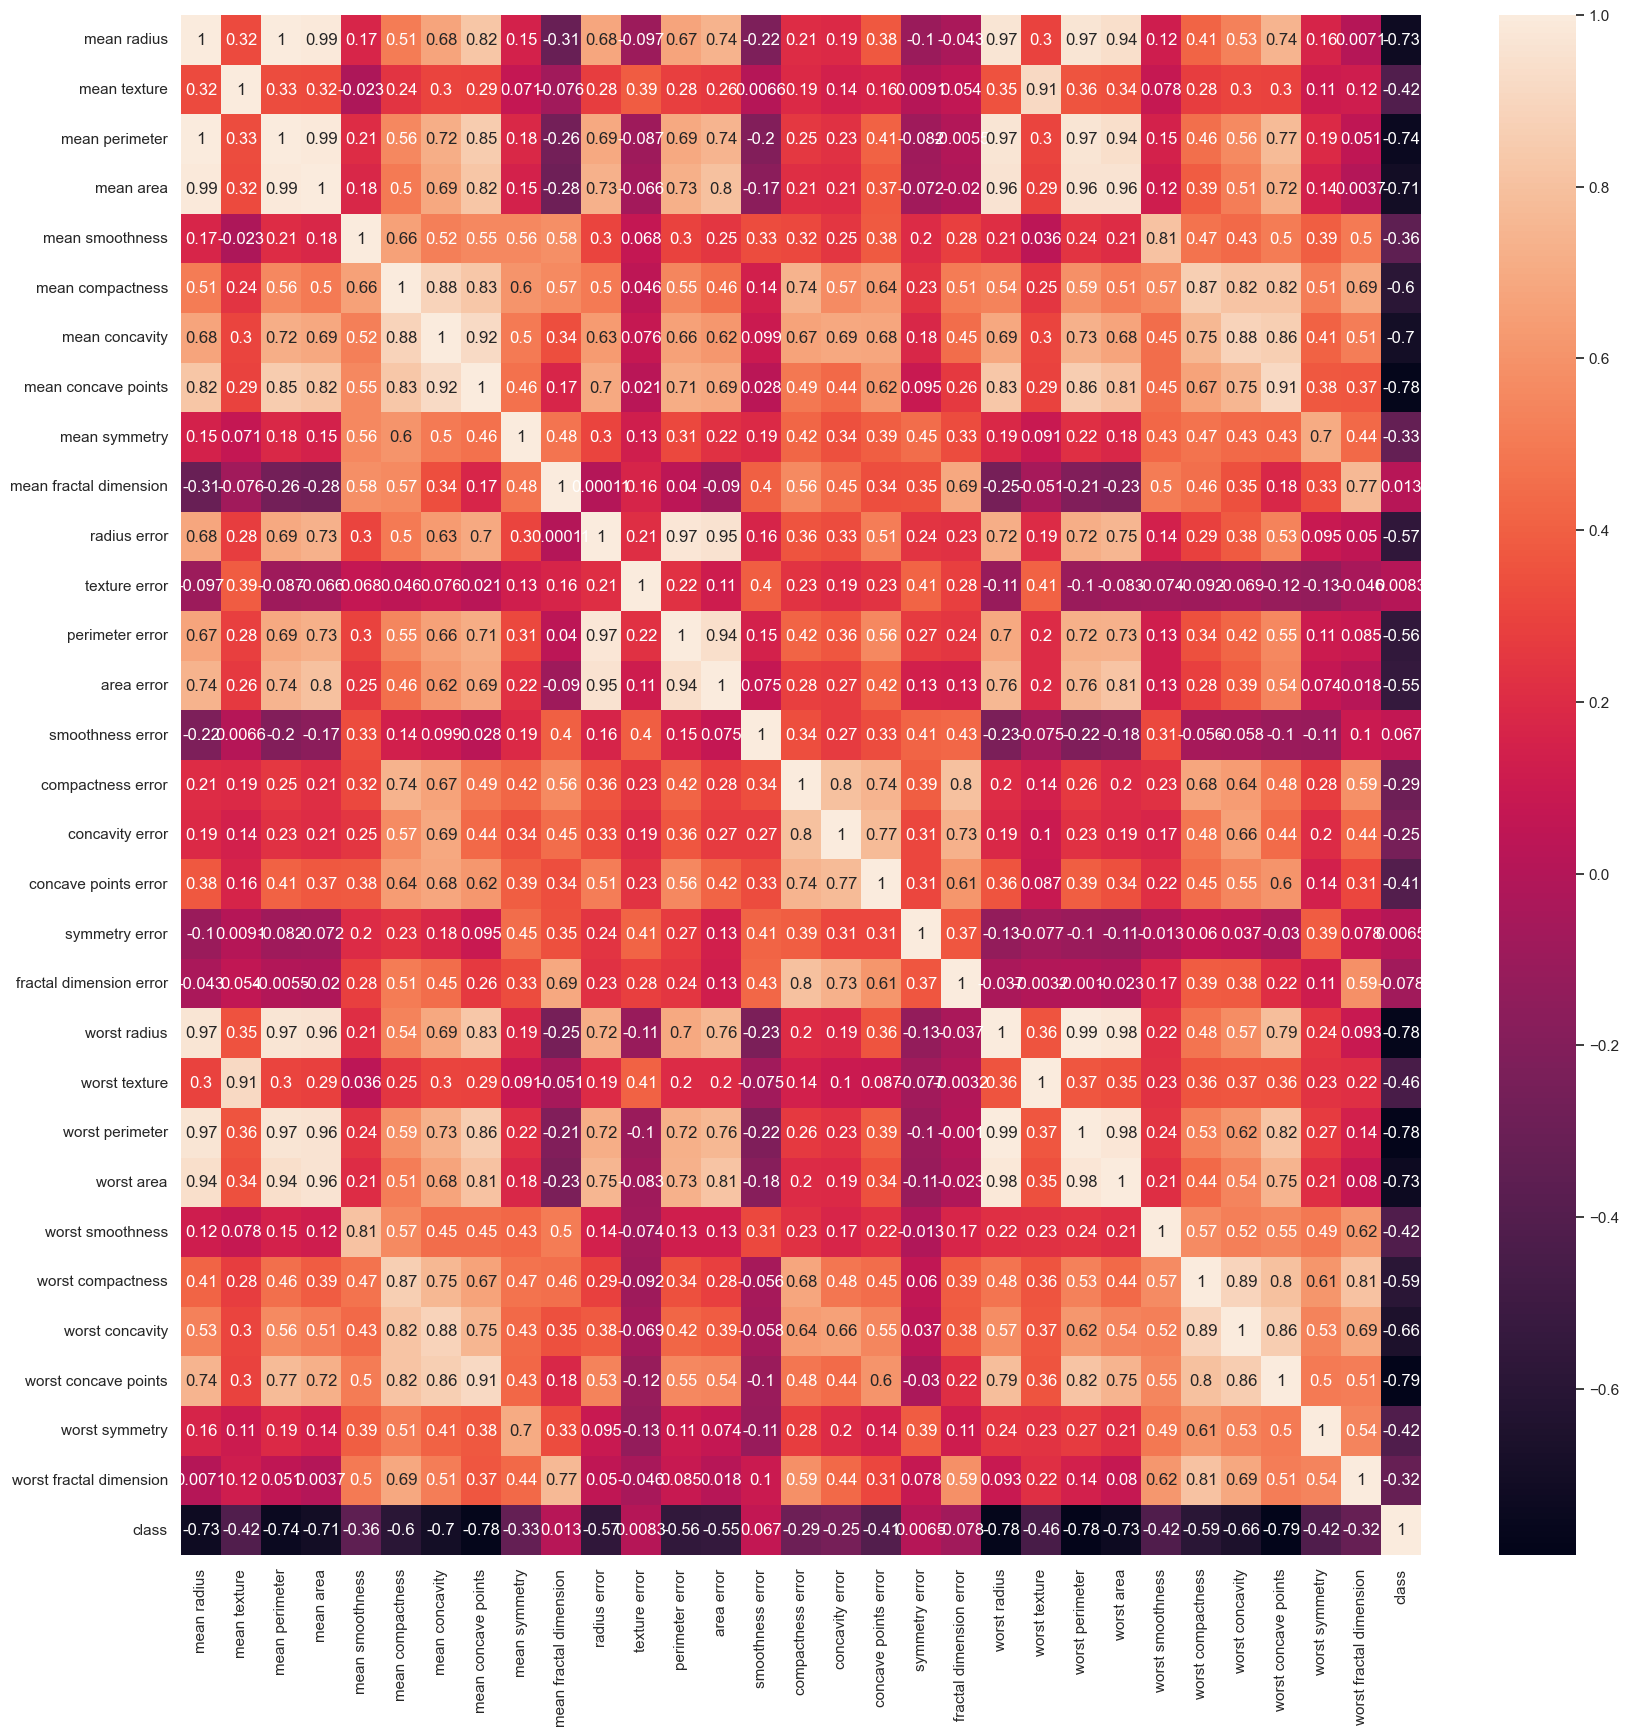

In [22]:
plt.figure(figsize=(20,20))
corr = df_breast_cancer.corr(method='pearson')
sns.heatmap(corr, annot=True)

### Splitting the data into Training data & Testing data 

Separating the features and class

In [23]:
X = df_breast_cancer.drop(columns='class', axis=1 )
Y = df_breast_cancer['class']

In [24]:
print('Dataset of all the attributes except the target-class attribute')
print(X)

Dataset of all the attributes except the target-class attribute
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   


In [25]:
print('Only the class attribute.')
print(Y)

Only the class attribute.
0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: class, Length: 569, dtype: int32


Splitting the data above into training and testing data and present the X data numbers of rows and columns 

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


###  Finding the best model

Libraries that has to be imported.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  

from sklearn.preprocessing import StandardScaler


The algorithm set that will be used in order to find the best model will be : Logistic Regression, Linear Discriminant Analysis, k-Nearest Neighbors, Naive Bayes, Decision trees and SVC. 

In [28]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
array = df_breast_cancer.values
X_train,Y_train
kfold = KFold(n_splits=10, shuffle=True,  random_state=7)

#### Logistic Regression

In [29]:
results = cross_val_score(LogisticRegression(solver='liblinear'), X_train, Y_train, cv=kfold)
print(results.mean()) ;# prints the mean estimated accuracy

0.945024154589372


#### Linear Discriminant Analysis

In [30]:
results = cross_val_score(LinearDiscriminantAnalysis(), X_train, Y_train, cv=kfold)
print(results.mean())

0.9514975845410628


#### k-Nearest Neighbors

In [31]:
results = cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv=kfold)
print(results.mean())

0.9361835748792272


#### Naive Bayes

In [32]:
results = cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold)
print(results.mean())

0.9295169082125604


#### Decision Trees

In [33]:
results = cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=kfold)
print(results.mean())

0.9339130434782609


#### SVC

In [34]:
results = cross_val_score(SVC(), X_train, Y_train, cv=kfold)
print(results.mean())

0.9186473429951691


Based on the aforementioned results, the ranking of accuracy from best to worst is as follows: LDA, logistic regression, Naive Bayes, k-nearest neighbors, decision trees and finally, SVC . 
- LDA : accurancy = 0.9514975845410628
- Logistic Regression : accurancy = 0.945024154589372
- k-Nearest Neighbors : accurancy = 0.9361835748792272
- Decision Tree : accurancy = 0.9339130434782609
- Naive Bayes : accurancy = 0.9295169082125604
- SVC : accurancy = 0.9186473429951691

Despite LDA exhibiting the highest accuracy, my preference is for **logistic regression**. This choice is grounded in the understanding that, despite its name containing "regression," logistic regression is specifically tailored for binary classification problems involving data with only two classes. Recognized for its simplicity in classification, logistic regression often serves as an initial step to establish a baseline before progressing to more intricate model types. Logistic regression operates by employing a linear combination of predictor variables to estimate the probability of the outcome being 0 or 1, aligning with the term "regression" in its name. Given our binary classification problem with values 0 and 1, the pragmatic decision is to leverage logistic regression for its simplicity and interpretability.

The dataset will be split it into training data and to testing data. This will happen in order to have data for training our model and then, test the model with the testing data. The test set will be 20% of the dataset and it will be chosen randomly. 

#### Logistic Regression

In [35]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

### Confusion Matrix

A confusion matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Z54JgbS4DUwWSknhDCvNTQ.png" width="400"/>

In [36]:
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[42  3]
 [ 4 65]]


As we can observe we have four values. **True Positive : TP=42**, which means that the number of instances that were bening, were predicted right. **False Positive : FP=3**, which means that were predicted as bening but there are actually malignant. **False Negative : FN=4**, which means that there were actually malignant but predicted as bening, and lastly, **True Negative : TN=65**, which means that the number of instances that were malignant, were predicted right.

#### Precision 

In [37]:
precision= precision_score(Y_test, predicted)
print('Precision score: {0:0.2f}'.format(precision))

Precision score: 0.96


#### Recall

In [38]:
recall = recall_score(Y_test, predicted)
print('Recall score: {0:0.2f}'.format(recall))

Recall score: 0.94


#### F1 Score

In [39]:
f1 = f1_score(Y_test, predicted)
print('F1 score: {0:0.2f}'.format(f1))

F1 score: 0.95
